In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pathlib2 as pathlib

In [2]:
cwd=pathlib.Path.cwd()
datadirpath=cwd.joinpath("data")
rawdatapath=datadirpath.joinpath("raw")

# Explore collaborative_books_df.csv
-  remove index column, as pandas index suffices
- columns: ['title', 'book_id', 'user_id_mapping', 'book_id_mapping','Predicted Rating', 'Actual Rating']

- Number of observations: 196296
- Number of unique book ids: 898
- Number of unique user ids: 66909
- Average actual rating: 3.922902147776827
- Average predicted rating: 3.8966672779883433
## explore user_id_mapping
- (repeat) Number of users: 66909
- Max number of books revied per user: 22
- Min number of books revied per user: 1
- Number of users with 1 review: 12202
- ... in %: 18.0%
- Number of users with less than 6 reviews: 59981
- ... in %: 90.0%
## explore book_id
- (repeat) Number of books: 898
- Max number of users reviewd per book: 1296
- Min number of users reviewd per book: 36
- Number of books with 1 review: 0
- ... in %: 0.0%
- Number of books with less than 6 reviews: 0
- ... in %: 0.0%


In [3]:
reviewdf=pd.read_csv(rawdatapath.joinpath("collaborative_books_df.csv"))
reviewdf=reviewdf.drop([reviewdf.columns[0]],axis=1) # removed unnamed index column
print(reviewdf.columns)

Index(['title', 'book_id', 'user_id_mapping', 'book_id_mapping',
       'Predicted Rating', 'Actual Rating'],
      dtype='object')


In [4]:
print(f"Number of observations: {len(reviewdf)}")
print(f"Number of unique book ids: {len(reviewdf["book_id"].unique())}")
print(f"Number of unique user ids: {len(reviewdf["user_id_mapping"].unique())}")
print(f"Average actual rating: {reviewdf["Actual Rating"].mean()}")
print(f"Average predicted rating: {reviewdf["Predicted Rating"].mean()}")

Number of observations: 196296
Number of unique book ids: 898
Number of unique user ids: 66909
Average actual rating: 3.922902147776827
Average predicted rating: 3.8966672779883433


<Axes: >

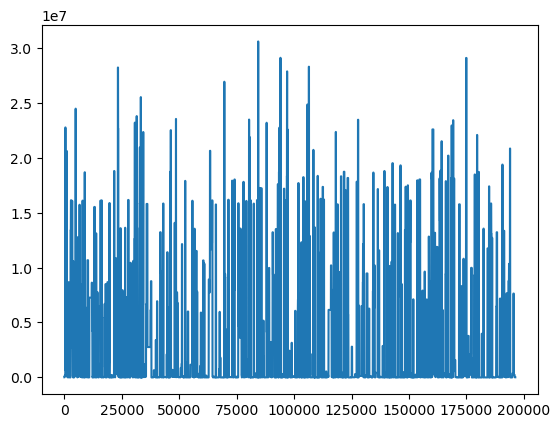

In [5]:
reviewdf["book_id"].plot() # not conclusive, try grouped by id, count as aggregate metric

## Explore user ids

In [6]:
# groupby user id
reviewdf_userids=reviewdf[["user_id_mapping","book_id"]].groupby(by="user_id_mapping").count()
reviewdf_userids=reviewdf_userids.reset_index()
reviewdf_userids=reviewdf_userids.rename(columns={"book_id":"book_count"})

In [7]:
reviewdf_userids
print(f"(repeat) Number of users: {len(reviewdf_userids)}")
print(f"Max number of books revied per user: {reviewdf_userids.book_count.max()}")
print(f"Min number of books revied per user: {reviewdf_userids.book_count.min()}")
print(f"Number of users with 1 review: {len(reviewdf_userids.query('book_count == 3'))}")
print(f"... in %: {round(len(reviewdf_userids.query('book_count == 3'))/len(reviewdf_userids),2)*100}%") # 18% is suboptimal --> prediction of score for single user is probably not going to work
print(f"Number of users with less than 6 reviews: {len(reviewdf_userids.query('book_count < 6'))}")
print(f"... in %: {round(len(reviewdf_userids.query('book_count < 6'))/len(reviewdf_userids),2)*100}%") # 90% is suboptimal

(repeat) Number of users: 66909
Max number of books revied per user: 22
Min number of books revied per user: 1
Number of users with 1 review: 12202
... in %: 18.0%
Number of users with less than 6 reviews: 59981
... in %: 90.0%


In [8]:
# reviewdf_userids.plot(kind='bar')

# Explore book ids

In [9]:
# groupby book_id
reviewdf_bookids=reviewdf[["book_id","user_id_mapping"]].groupby(by="book_id").count()
reviewdf_bookids=reviewdf_bookids.reset_index()
reviewdf_bookids=reviewdf_bookids.rename(columns={"user_id_mapping":"user_count"})

In [10]:
print(f"(repeat) Number of books: {len(reviewdf_bookids)}")
print(f"Max number of users reviewd per book: {reviewdf_bookids.user_count.max()}")
print(f"Min number of users reviewd per book: {reviewdf_bookids.user_count.min()}")
print(f"Number of books with 1 review: {len(reviewdf_bookids.query('user_count == 3'))}")
print(f"... in %: {round(len(reviewdf_bookids.query('user_count == 3'))/len(reviewdf_bookids),2)*100}%") # 18% is suboptimal --> prediction of score for single user is probably not going to work
print(f"Number of books with less than 6 reviews: {len(reviewdf_bookids.query('user_count < 6'))}")
print(f"... in %: {round(len(reviewdf_bookids.query('user_count < 6'))/len(reviewdf_bookids),2)*100}%") # 90% is suboptimal

(repeat) Number of books: 898
Max number of users reviewd per book: 1296
Min number of users reviewd per book: 36
Number of books with 1 review: 0
... in %: 0.0%
Number of books with less than 6 reviews: 0
... in %: 0.0%


# Explore Ratings

In [ ]:
reviewvaluecountsdf=reviewdf["Actual Rating"].value_counts()
reviewssum=reviewvaluecountsdf.sum()
reviewvaluecountsdf["percentage"]=reviewvaluecountsdf.transform(func=lambda x:x/reviewssum*100,axis=0)

In [29]:
print(f"(repeat) Average actual rating: {reviewdf["Actual Rating"].mean()}")
print(f"Sum of reviews: {reviewssum}")
print(f"Overview of Rating occurence: {reviewvaluecountsdf}")
print(f"... in percentage: {reviewvaluecountsdf["percentage"]}") # comparatively few bad reviews

print(f"(repeat) Average predicted rating: {reviewdf["Predicted Rating"].mean()}")

(repeat) Average actual rating: 3.922902147776827
Sum of reviews: 196296
Overview of Rating occurence: Actual Rating
4                                                         69813
5                                                         66663
3                                                         42680
2                                                         12303
1                                                          4837
percentage    Actual Rating
4    35.565167
5    33.960447
3 ...
Name: count, dtype: object
... in percentage: Actual Rating
4    35.565167
5    33.960447
3    21.742674
2     6.267575
1     2.464136
Name: count, dtype: float64
(repeat) Average predicted rating: 3.8966672779883433


In [26]:
reviewvaluecountsdf

Actual Rating
4    69813
5    66663
3    42680
2    12303
1     4837
Name: count, dtype: int64